In [217]:
import pandas as pd
import matplotlib.pyplot
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [218]:
# Retrives resuable funcitons and load the data 
%run mlLibrary.ipynb
%run BasicDataExploration.ipynb

# Load the dataset
df_revision_3 = pd.read_csv('DataSampled.csv')
df_revision_3.head(2)

,MMSE,Age,Weight,Height,Waist,Hip,Smoking,Smoking (packet/year),Alcohol,DM,DM duration,İnsülin,DM drug,Hiperlipidemi,Dyslipidemia duration,Dyslipidemia drugs,KAH,KAH duration,Hipotiroidi,ASTIM,KOAH,OP,Other(s),HT,Anti-HT drug type,HT duration,Education,Occupation,Working Status,Exercise,LowCST,CST,Gait speed,Low grip strength,Grip strength,SARCOPENIA,STAR,BMI,Gender
0,NaN,64,66.0,155.0,89.0,104.0,0.0,0,0,0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0,NaN,0.0,High School,Officer,Retire,0,0.0,8.1,1.28,0.0,28.0,0.0,1.00,27.4,F
1,NaN,53,55.0,150.0,77.0,97.0,0.0,0,0,0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,aritmi,0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,8.0,1.47,1.0,16.0,0.0,1.84,24.4,F


In [219]:
# Create the dataframes to show the data
model_2_logistic_male = getResultsDataFrame("h_model_2_logistic_male")
model_2_forest_male   = getResultsDataFrame("h_model_2_forest_male")
model_2_gradient_male = getResultsDataFrame("h_model_2_gradient")

model_2_logistic_female = getResultsDataFrame("h_model_2_logistic_female")
model_2_forest_female = getResultsDataFrame("h_model_2_forest_female")
model_2_gradient_female = getResultsDataFrame("h_model_2_gradient_female")

In [220]:
# Create the male/female models
column_list = ['Gender', 'CST', 'Gait speed', "SARCOPENIA"]

# Create the exact dataframe needed and add the index column to merge the data frame created in the model with the data from the previous model
(df_female, df_male) = createDataframesForModel(df_revision_3, column_list)

# For the model created reset the index so the number are sequential (ex. 1,2,3,4,5) not (1, 3, 4, ,6) and make it a column
df_female = df_female.reset_index()
df_male = df_male.reset_index()
df_female["index"] = df_female.index
df_male["index"] = df_male.index

print("Shape of female", df_female.shape, "Shape of male", df_male.shape)

Shape of female (924, 5) Shape of male (379, 5)


In [221]:
# Show information about the male dataframe
column_info = info_about_columns(dataframe=df_male, data_science_descriptions=None)
column_info

,DataType,# of Categories,categories/sample ratio,missing values,missing values %
index,int64,379,100.0,0,0.000000
Gender,object,1,0.0,0,0.000000
CST,float64,116,31.0,0,0.000000
Gait speed,float64,110,29.0,0,0.000000
SARCOPENIA,float64,2,1.0,1,0.263852


In [222]:
show_examples_of_data(dataframe=df_male,  data_information=column_info, category_cutoff=5)

,Field,Value,Number of Values
0,index,0 to 378,NA
1,Gender,[m],1
2,CST,1.1 to 50.0,NA
3,Gait speed,0.34 to 1.93,NA
4,SARCOPENIA,"[0.0, 1.0, nan]",3


In [223]:
# Show information about the male dataframe
column_info = info_about_columns(dataframe=df_female, data_science_descriptions=None)
column_info

,DataType,# of Categories,categories/sample ratio,missing values,missing values %
index,int64,924,100.0,0,0.000000
Gender,object,1,0.0,0,0.000000
CST,float64,166,18.0,0,0.000000
Gait speed,float64,136,15.0,3,0.324675
SARCOPENIA,float64,2,0.0,0,0.000000


In [224]:
show_examples_of_data(dataframe=df_female,  data_information=column_info, category_cutoff=5)

,Field,Value,Number of Values
0,index,0 to 923,NA
1,Gender,[f],1
2,CST,2.2 to 50.0,NA
3,Gait speed,0.25 to 2.41,NA
4,SARCOPENIA,"[0.0, 1.0]",2


Exploration of the Numeric Data

Plot the Historgram of the Numerical Data to decide to use either normalization or standardization 
> * StadardScalar will used for Gait and Gait Speed since they closely resemble Gaussian 

Plot the boxplot to get a look at the ouliers
> * Male CST seems to have a lot of outliers .  These could be points that are hard to classify since they may invade another targets category.
> > * The first step will be to remove them.
> * The numeric plots show ranges that are not logarithmic

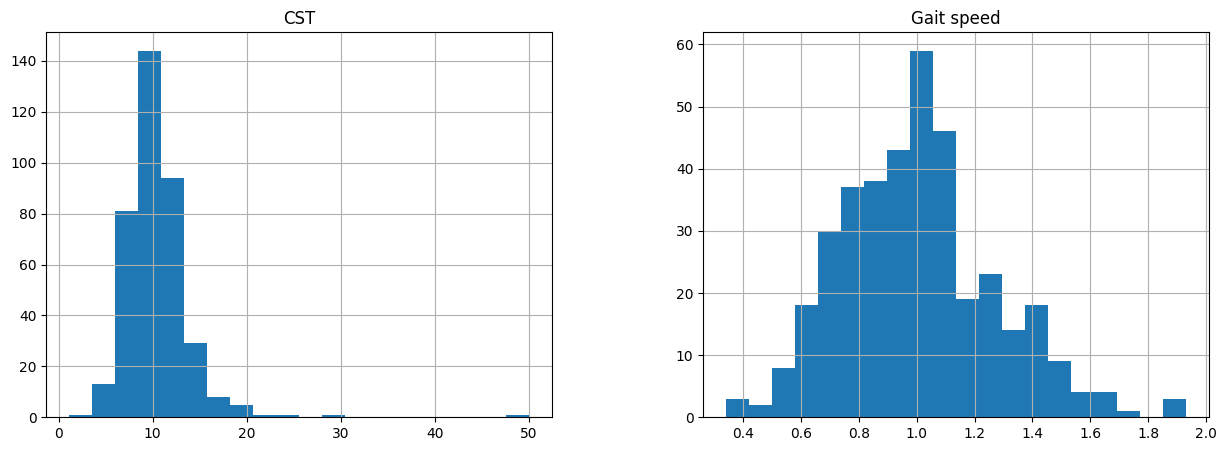

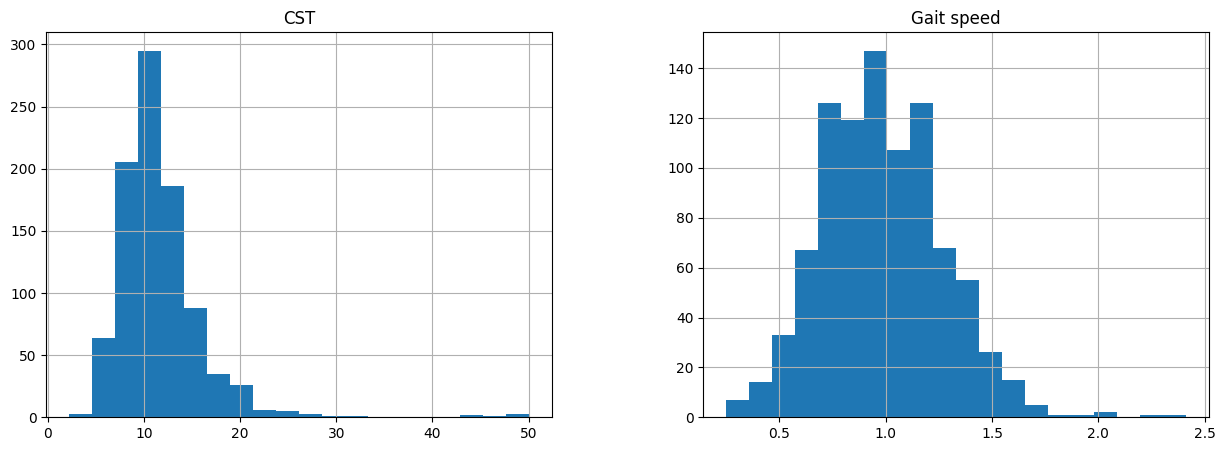

In [225]:
# Look at the histograms of the Age, Weight and Height
(figure, ravel_ax) = createGraph(1,2)
(figure, ravel_ax1) = createGraph(1,2)

columns_to_plot = ['CST', 'Gait speed']
for index, column in enumerate(columns_to_plot):
    df_male.hist(column=column, bins=20, ax=ravel_ax[index])
    df_female.hist(column=column, bins=20, ax=ravel_ax1[index])



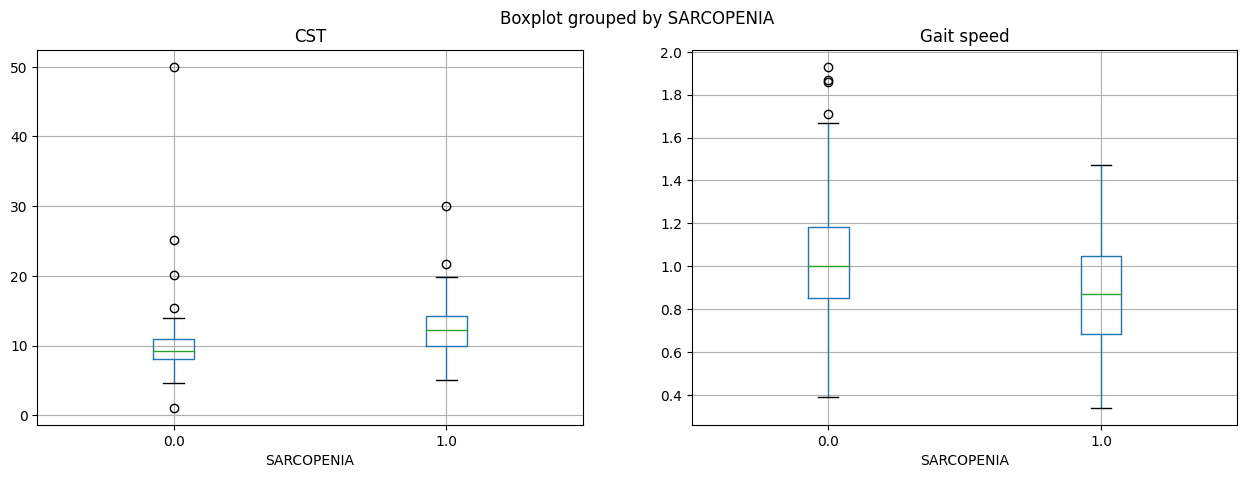

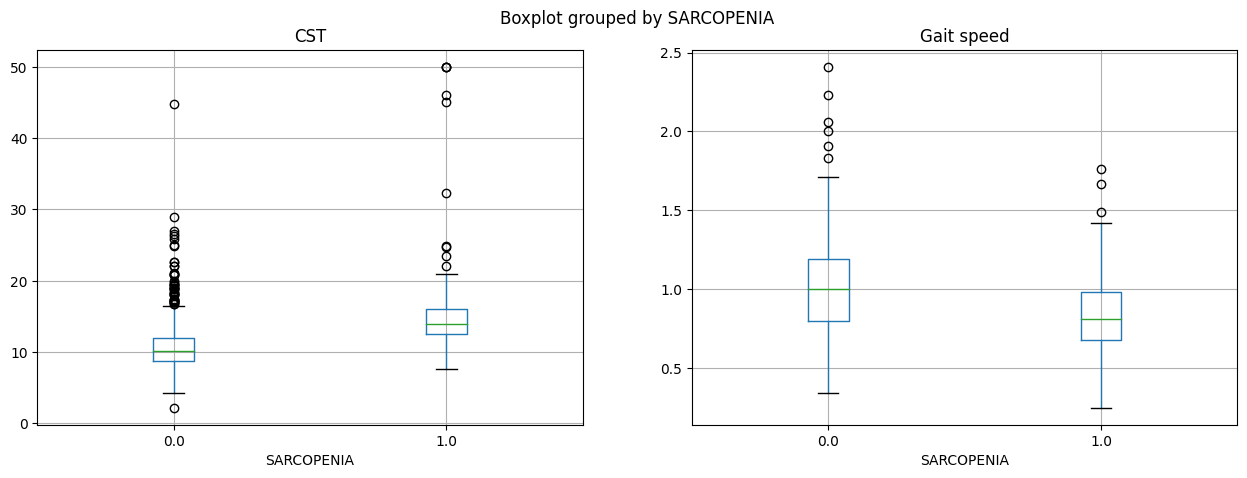

In [226]:
# Look at the Box plot to get a sense of the ourliers and should Log

(figure, ravel_ax) = createGraph(1,2)
(figure, ravel_ax1) = createGraph(1,2)

columns_to_plot = ['CST', 'Gait speed']
for index, column in enumerate(columns_to_plot):
    df_male.boxplot(column=column,   by='SARCOPENIA', ax=ravel_ax[index])
    df_female.boxplot(column=column, by='SARCOPENIA', ax=ravel_ax1[index])

In [227]:
## Data Clean -- None is needed since we have two number fields.

# Coorelation 
Since I am new to Data Science I want a high correlation to remove a feature ( Correlation of .9 or greater)

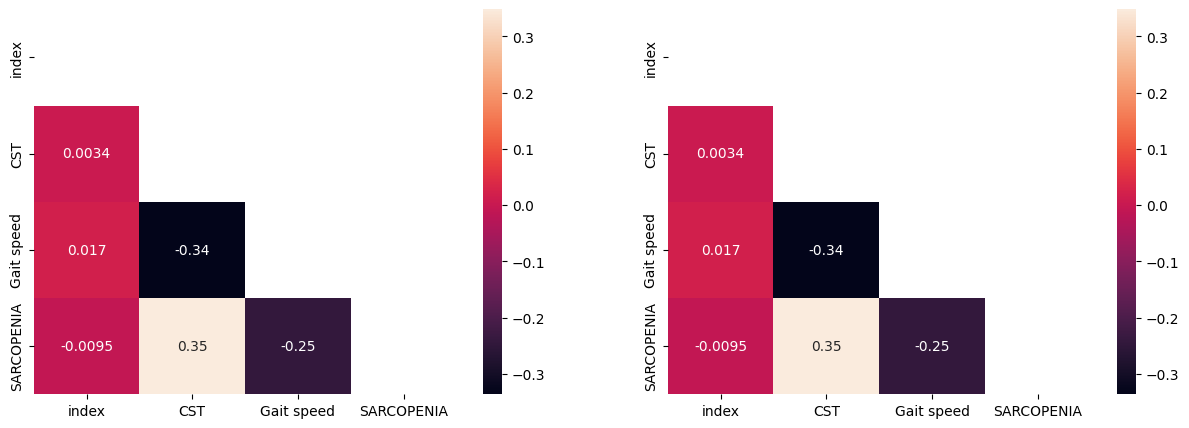

In [228]:
(fiure, ax) = createGraph(1,2)

createHeatMap(df_male,0)
createHeatMap(df_female,1)

In [229]:
## Save the data so another model can use it 

## Merge the Data Sets with the column gender

In [230]:
#
# Merge the dataframe from model 1 with the new data from model 2 using Gender Column to do the inner join0
# Before the merge delete the column 'SACROPENIA' since we do not need the same column twice
# After the merge delete the Gender column from the dataframe created in model 2 since it was only for the inner join

model_1_female = pd.read_csv('model_1_female.csv')
model_1_male = pd.read_csv('model_1_male.csv')

model_1_female["index"] = model_1_female.index
model_1_male["index"] = model_1_male.index

model_2_female = model_1_female.merge(df_female, how='inner', on="index")
model_2_male = model_1_male.merge(df_male, how='inner', on='index')

model_2_male = model_2_male.drop(['Gender_x', 'Gender_y', 'Unnamed: 0', 'SARCOPENIA_x'], axis=1)
model_2_male = model_2_male.rename(columns={'SARCOPENIA_y':'SARCOPENIA'})

model_2_female = model_2_female.drop(['Gender_x', 'Gender_y', 'Unnamed: 0', 'SARCOPENIA_x' ], axis=1)
model_2_female = model_2_female.rename(columns={'SARCOPENIA_y':'SARCOPENIA'})

print("Size of the male model", model_2_male.shape)
print("Size of the female model", model_2_female.shape)

model_2_male.head(5)

Size of the male model (379, 12)
Size of the female model (924, 12)


,Age,Weight,Height,Exercise,HT,DM,Education,Smoking,index,CST,Gait speed,SARCOPENIA
0,57,98.0,179.0,1-2/week,1,0,high_school,0,0,8.0,0.83,0.0
1,76,70.0,168.0,3-4/week,1,1,university,1,1,10.0,1.20,1.0
2,71,108.0,164.0,0,1,1,primary school,1,2,12.9,0.83,1.0
3,51,82.0,178.0,0,0,0,high_school,0,3,7.0,1.07,0.0
4,74,54.0,166.0,3-4/week,1,0,primary school,0,4,8.4,0.95,0.0


In [231]:
## Store the datafrmaes for both male and female 
## Get rid of the gender will only be used for merging model in different notebooks.  It is no longer needed
model_2_female.to_csv('model_2_female.csv')
model_2_male.to_csv('model_2_male.csv')

df_male_clean = df_male.drop('Gender', axis=1)
df_female_clean = df_female.drop('Gender', axis=1)


### Remove any rows where any column has no data
I would have put this into a column transformer, but an Imputer will not remove rows and of the guiding idas was to create a model quickly and optimize at later time.

In [232]:
original_size_male = model_2_male.shape
model_2_male = model_2_male.dropna(axis=0)
new_size_male = model_2_male.shape
print("Male Original/New", original_size_male, new_size_male)

Male Original/New (379, 12) (373, 12)


In [233]:
original_size_female = model_2_female.shape
model_2_female = model_2_female.dropna(axis=0)
new_size_female = model_2_female.shape
print("Female Original/New", original_size_female, new_size_female)

Female Original/New (924, 12) (905, 12)


In [234]:
## Create Training Set and graph the balance/inbalance of the dataset

In [235]:
# Create the Training and Datasets
(XTrain_female, XTest_female, yTrain_female, yTest_female) = createTestTrainData(dataframe=model_2_female, test_size=.25)
(XTrain_male,   XTest_male,   yTrain_male,   yTest_male)   = createTestTrainData(dataframe=model_2_male, test_size=.25)


In [236]:
## Analyzing the Balancing/Inbalancing

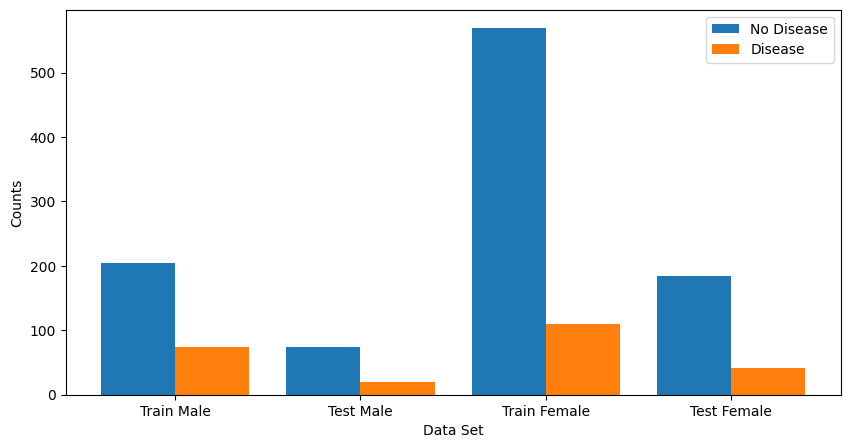

In [237]:
# Show the counts for the disease 
columns = ["Traing Male", "Test Male", "Train Female", "Test Female"]
showBalanceOfDataset(columns, yTrain_male, yTest_male, yTrain_female, yTest_female) 

## Analysis of creating the Training/Testing for the Dataset.

The dataset is out of whack.  It is definietly unbalanced.   However, I have decided to move on and take this into account later.
Usually I would remove data, but in this case, I may want to create new data since the counts of the disease is so null.  However,
this was mentioned in class

### Create the Column Transofrmers -- I wanted to put all the preproccessing here, but could not delete rows in a column transformer

In [238]:
# column_transforms_list = [
#     ("encoding", OneHotEncoder(), ["Exercise","HT","DM", "Education", "Smoking"])
# ]
    
columnTransformer = ColumnTransformer([
    ('normalization', MinMaxScaler(), ["Age"]),
    ('standard scalar', StandardScaler(), [ "Height", "Weight" ]),
    ('ohe_exercise', OneHotEncoder(handle_unknown='ignore'), [ "HT", "Education", "DM", "Smoking", "Exercise"])
],remainder='passthrough')

In [239]:
# Lets take a look at LogisticRegresson

# The first test must select the solver since the the penalty hyperparameter must have the correct vslues for the 
# solver hyperparameter.  If the solver is invalid for the penalty then an error error generated and the training
# and test sets would return NaN instead of percentage correct.  Optimize for this parameter first then the others.
# Two parameter dictionaries will need so that we can evaluate each solver without any issues.

parameters1 = {
      "logisticRegression__solver": [ 'newton-cholesky', 'newton-cg', 'liblinear', 'sag', 'saga'] 
}

parameters2 = {
     "logisticRegression__solver": [ 'lbfgs' ]
}

parameters3 = {
    'logisticRegression__penalty': [ 'l2', None],
    'logisticRegression__C': [ 100, 10, 1, 0.1, .01, .001 ],
    'logisticRegression__class_weight' : [ None, 'balanced']
}

# Make the PipeLine 
pipeline = Pipeline(
     [
         ( "Column Transformers", columnTransformer),
         ( "logisticRegression", LogisticRegression(max_iter=8000, solver="lbfgs"))
     ])

grid_male_list = []
grid_female_list = []
y_predictions_male_list = []
y_predictions_female_list = []

experiments = [ parameters1, parameters2, parameters3 ]
for experiment in experiments:
    (grid, y_predictions_male) = trainTestScore(pipeline, experiment, 10, (XTrain_male, yTrain_male), (XTest_male, yTest_male))
    (grid2, y_predictions_female) = trainTestScore(pipeline, experiment, 10, (XTrain_female, yTrain_female), (XTest_female, yTest_female))

    grid_male_list.append(grid)
    grid_female_list.append(grid2)
    y_predictions_male_list.append(y_predictions_male)
    y_predictions_female_list.append(y_predictions_female)


Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV 1/10] END logisticRegression__solver=newton-cholesky;, score=(train=0.829, test=0.786) total time=   0.0s
[CV 2/10] END logisticRegression__solver=newton-cholesky;, score=(train=0.801, test=0.929) total time=   0.0s
[CV 3/10] END logisticRegression__solver=newton-cholesky;, score=(train=0.837, test=0.821) total time=   0.0s
[CV 4/10] END logisticRegression__solver=newton-cholesky;, score=(train=0.845, test=0.714) total time=   0.0s
[CV 5/10] END logisticRegression__solver=newton-cholesky;, score=(train=0.817, test=0.786) total time=   0.0s
[CV 6/10] END logisticRegression__solver=newton-cholesky;, score=(train=0.821, test=0.821) total time=   0.0s
[CV 7/10] END logisticRegression__solver=newton-cholesky;, score=(train=0.829, test=0.750) total time=   0.0s
[CV 8/10] END logisticRegression__solver=newton-cholesky;, score=(train=0.817, test=0.786) total time=   0.0s
[CV 9/10] END logisticRegression__solver=newton-cholesky;, 

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None wil

[CV 6/10] END logisticRegression__C=100, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.813, test=0.821) total time=   0.0s
[CV 7/10] END logisticRegression__C=100, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.837, test=0.821) total time=   0.0s
[CV 8/10] END logisticRegression__C=100, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.825, test=0.786) total time=   0.0s
[CV 9/10] END logisticRegression__C=100, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.829, test=0.786) total time=   0.0s
[CV 10/10] END logisticRegression__C=100, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.829, test=0.741) total time=   0.0s
[CV 1/10] END logisticRegression__C=100, logisticRegression__class_weight=balanced, logisticRegression__penalty=l2;, score=(train=0.781, test=0.786) total time=   0.0s
[

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None wil

[CV 9/10] END logisticRegression__C=100, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.805, test=0.679) total time=   0.0s
[CV 10/10] END logisticRegression__C=100, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.821, test=0.815) total time=   0.0s
[CV 1/10] END logisticRegression__C=10, logisticRegression__class_weight=None, logisticRegression__penalty=l2;, score=(train=0.837, test=0.821) total time=   0.0s
[CV 2/10] END logisticRegression__C=10, logisticRegression__class_weight=None, logisticRegression__penalty=l2;, score=(train=0.801, test=0.964) total time=   0.0s
[CV 3/10] END logisticRegression__C=10, logisticRegression__class_weight=None, logisticRegression__penalty=l2;, score=(train=0.841, test=0.821) total time=   0.0s
[CV 4/10] END logisticRegression__C=10, logisticRegression__class_weight=None, logisticRegression__penalty=l2;, score=(train=0.833, test=0.714) total time=   0.0s
[CV 5/1

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None wil

[CV 9/10] END logisticRegression__C=10, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.829, test=0.786) total time=   0.0s
[CV 10/10] END logisticRegression__C=10, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.829, test=0.741) total time=   0.0s
[CV 1/10] END logisticRegression__C=10, logisticRegression__class_weight=balanced, logisticRegression__penalty=l2;, score=(train=0.793, test=0.786) total time=   0.0s
[CV 2/10] END logisticRegression__C=10, logisticRegression__class_weight=balanced, logisticRegression__penalty=l2;, score=(train=0.797, test=0.857) total time=   0.0s
[CV 3/10] END logisticRegression__C=10, logisticRegression__class_weight=balanced, logisticRegression__penalty=l2;, score=(train=0.789, test=0.714) total time=   0.0s
[CV 4/10] END logisticRegression__C=10, logisticRegression__class_weight=balanced, logisticRegression__penalty=l2;, score=(train=0.793, test=0.679) total time=   0.0s
[

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None wil

[CV 9/10] END logisticRegression__C=10, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.805, test=0.679) total time=   0.0s
[CV 10/10] END logisticRegression__C=10, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.821, test=0.815) total time=   0.0s
[CV 1/10] END logisticRegression__C=1, logisticRegression__class_weight=None, logisticRegression__penalty=l2;, score=(train=0.829, test=0.786) total time=   0.0s
[CV 2/10] END logisticRegression__C=1, logisticRegression__class_weight=None, logisticRegression__penalty=l2;, score=(train=0.805, test=0.929) total time=   0.0s
[CV 3/10] END logisticRegression__C=1, logisticRegression__class_weight=None, logisticRegression__penalty=l2;, score=(train=0.837, test=0.821) total time=   0.0s
[CV 4/10] END logisticRegression__C=1, logisticRegression__class_weight=None, logisticRegression__penalty=l2;, score=(train=0.845, test=0.714) total time=   0.0s
[CV 5/10] END

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None wil

[CV 1/10] END logisticRegression__C=0.1, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.833, test=0.821) total time=   0.0s
[CV 2/10] END logisticRegression__C=0.1, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.797, test=1.000) total time=   0.0s
[CV 3/10] END logisticRegression__C=0.1, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.849, test=0.857) total time=   0.0s
[CV 4/10] END logisticRegression__C=0.1, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.833, test=0.679) total time=   0.0s
[CV 5/10] END logisticRegression__C=0.1, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.813, test=0.750) total time=   0.0s
[CV 6/10] END logisticRegression__C=0.1, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.813, test=0.821) total time=   0.0s
[CV 

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None wil

[CV 5/10] END logisticRegression__C=0.1, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.801, test=0.821) total time=   0.0s
[CV 6/10] END logisticRegression__C=0.1, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.793, test=0.857) total time=   0.0s
[CV 7/10] END logisticRegression__C=0.1, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.821, test=0.679) total time=   0.0s
[CV 8/10] END logisticRegression__C=0.1, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.797, test=0.821) total time=   0.0s
[CV 9/10] END logisticRegression__C=0.1, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.805, test=0.679) total time=   0.0s
[CV 10/10] END logisticRegression__C=0.1, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.821, test=0.815

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None wil

[CV 1/10] END logisticRegression__C=0.01, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.833, test=0.821) total time=   0.0s
[CV 2/10] END logisticRegression__C=0.01, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.797, test=1.000) total time=   0.0s
[CV 3/10] END logisticRegression__C=0.01, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.849, test=0.857) total time=   0.0s
[CV 4/10] END logisticRegression__C=0.01, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.833, test=0.679) total time=   0.0s
[CV 5/10] END logisticRegression__C=0.01, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.813, test=0.750) total time=   0.0s
[CV 6/10] END logisticRegression__C=0.01, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.813, test=0.821) total time=   0.0

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None wil

[CV 7/10] END logisticRegression__C=0.01, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.821, test=0.679) total time=   0.0s
[CV 8/10] END logisticRegression__C=0.01, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.797, test=0.821) total time=   0.0s
[CV 9/10] END logisticRegression__C=0.01, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.805, test=0.679) total time=   0.0s
[CV 10/10] END logisticRegression__C=0.01, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.821, test=0.815) total time=   0.0s
[CV 1/10] END logisticRegression__C=0.001, logisticRegression__class_weight=None, logisticRegression__penalty=l2;, score=(train=0.733, test=0.714) total time=   0.0s
[CV 2/10] END logisticRegression__C=0.001, logisticRegression__class_weight=None, logisticRegression__penalty=l2;, score=(train=0.729, test=0.750) to

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None wil

[CV 4/10] END logisticRegression__C=0.001, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.833, test=0.679) total time=   0.0s
[CV 5/10] END logisticRegression__C=0.001, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.813, test=0.750) total time=   0.0s
[CV 6/10] END logisticRegression__C=0.001, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.813, test=0.821) total time=   0.0s
[CV 7/10] END logisticRegression__C=0.001, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.837, test=0.821) total time=   0.0s
[CV 8/10] END logisticRegression__C=0.001, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.825, test=0.786) total time=   0.0s
[CV 9/10] END logisticRegression__C=0.001, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.829, test=0.786) total time=

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None wil

[CV 1/10] END logisticRegression__C=100, logisticRegression__class_weight=None, logisticRegression__penalty=l2;, score=(train=0.861, test=0.853) total time=   0.1s
[CV 2/10] END logisticRegression__C=100, logisticRegression__class_weight=None, logisticRegression__penalty=l2;, score=(train=0.861, test=0.853) total time=   0.1s
[CV 3/10] END logisticRegression__C=100, logisticRegression__class_weight=None, logisticRegression__penalty=l2;, score=(train=0.867, test=0.794) total time=   0.1s
[CV 4/10] END logisticRegression__C=100, logisticRegression__class_weight=None, logisticRegression__penalty=l2;, score=(train=0.869, test=0.853) total time=   0.1s
[CV 5/10] END logisticRegression__C=100, logisticRegression__class_weight=None, logisticRegression__penalty=l2;, score=(train=0.861, test=0.853) total time=   0.1s
[CV 6/10] END logisticRegression__C=100, logisticRegression__class_weight=None, logisticRegression__penalty=l2;, score=(train=0.857, test=0.912) total time=   0.1s
[CV 7/10] END lo

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/10] END logisticRegression__C=100, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.861, test=0.853) total time=   0.1s
[CV 3/10] END logisticRegression__C=100, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.872, test=0.794) total time=   0.1s
[CV 4/10] END logisticRegression__C=100, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.870, test=0.853) total time=   0.1s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/10] END logisticRegression__C=100, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.861, test=0.868) total time=   0.1s
[CV 6/10] END logisticRegression__C=100, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.856, test=0.912) total time=   0.2s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 7/10] END logisticRegression__C=100, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.861, test=0.868) total time=   0.1s
[CV 8/10] END logisticRegression__C=100, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.861, test=0.853) total time=   0.1s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 9/10] END logisticRegression__C=100, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.866, test=0.866) total time=   0.1s
[CV 10/10] END logisticRegression__C=100, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.853, test=0.881) total time=   0.1s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/10] END logisticRegression__C=100, logisticRegression__class_weight=balanced, logisticRegression__penalty=l2;, score=(train=0.782, test=0.765) total time=   0.2s
[CV 2/10] END logisticRegression__C=100, logisticRegression__class_weight=balanced, logisticRegression__penalty=l2;, score=(train=0.787, test=0.735) total time=   0.1s
[CV 3/10] END logisticRegression__C=100, logisticRegression__class_weight=balanced, logisticRegression__penalty=l2;, score=(train=0.790, test=0.721) total time=   0.1s
[CV 4/10] END logisticRegression__C=100, logisticRegression__class_weight=balanced, logisticRegression__penalty=l2;, score=(train=0.793, test=0.794) total time=   0.1s
[CV 5/10] END logisticRegression__C=100, logisticRegression__class_weight=balanced, logisticRegression__penalty=l2;, score=(train=0.790, test=0.794) total time=   0.1s
[CV 6/10] END logisticRegression__C=100, logisticRegression__class_weight=balanced, logisticRegression__penalty=l2;, score=(train=0.787, test=0.765) total time=

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/10] END logisticRegression__C=100, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.784, test=0.750) total time=   0.2s
[CV 2/10] END logisticRegression__C=100, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.787, test=0.750) total time=   0.1s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/10] END logisticRegression__C=100, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.785, test=0.735) total time=   0.3s
[CV 4/10] END logisticRegression__C=100, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.793, test=0.794) total time=   0.2s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/10] END logisticRegression__C=100, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.793, test=0.809) total time=   0.2s
[CV 6/10] END logisticRegression__C=100, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.785, test=0.765) total time=   0.2s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 7/10] END logisticRegression__C=100, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.782, test=0.765) total time=   0.2s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 8/10] END logisticRegression__C=100, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.790, test=0.779) total time=   0.2s
[CV 9/10] END logisticRegression__C=100, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.794, test=0.701) total time=   0.2s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 10/10] END logisticRegression__C=100, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.771, test=0.851) total time=   0.2s
[CV 1/10] END logisticRegression__C=10, logisticRegression__class_weight=None, logisticRegression__penalty=l2;, score=(train=0.862, test=0.853) total time=   0.1s
[CV 2/10] END logisticRegression__C=10, logisticRegression__class_weight=None, logisticRegression__penalty=l2;, score=(train=0.861, test=0.853) total time=   0.1s
[CV 3/10] END logisticRegression__C=10, logisticRegression__class_weight=None, logisticRegression__penalty=l2;, score=(train=0.866, test=0.794) total time=   0.1s
[CV 4/10] END logisticRegression__C=10, logisticRegression__class_weight=None, logisticRegression__penalty=l2;, score=(train=0.864, test=0.853) total time=   0.1s
[CV 5/10] END logisticRegression__C=10, logisticRegression__class_weight=None, logisticRegression__penalty=l2;, score=(train=0.861, test=0.853) total time=   0.1s
[CV 6/10] END 

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/10] END logisticRegression__C=10, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.872, test=0.794) total time=   0.1s
[CV 4/10] END logisticRegression__C=10, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.870, test=0.853) total time=   0.1s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/10] END logisticRegression__C=10, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.861, test=0.868) total time=   0.1s
[CV 6/10] END logisticRegression__C=10, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.856, test=0.912) total time=   0.2s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 7/10] END logisticRegression__C=10, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.861, test=0.868) total time=   0.1s
[CV 8/10] END logisticRegression__C=10, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.861, test=0.853) total time=   0.1s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 9/10] END logisticRegression__C=10, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.866, test=0.866) total time=   0.1s
[CV 10/10] END logisticRegression__C=10, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.853, test=0.881) total time=   0.1s
[CV 1/10] END logisticRegression__C=10, logisticRegression__class_weight=balanced, logisticRegression__penalty=l2;, score=(train=0.782, test=0.765) total time=   0.1s
[CV 2/10] END logisticRegression__C=10, logisticRegression__class_weight=balanced, logisticRegression__penalty=l2;, score=(train=0.785, test=0.750) total time=   0.2s
[CV 3/10] END logisticRegression__C=10, logisticRegression__class_weight=balanced, logisticRegression__penalty=l2;, score=(train=0.789, test=0.721) total time=   0.1s
[CV 4/10] END logisticRegression__C=10, logisticRegression__class_weight=balanced, logisticRegression__penalty=l2;, score=(train=0.790, test=0.794) total time=   0.2s
[

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/10] END logisticRegression__C=10, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.784, test=0.750) total time=   0.2s
[CV 2/10] END logisticRegression__C=10, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.787, test=0.750) total time=   0.1s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/10] END logisticRegression__C=10, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.785, test=0.735) total time=   0.2s
[CV 4/10] END logisticRegression__C=10, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.793, test=0.794) total time=   0.2s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/10] END logisticRegression__C=10, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.793, test=0.809) total time=   0.1s
[CV 6/10] END logisticRegression__C=10, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.785, test=0.765) total time=   0.2s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 7/10] END logisticRegression__C=10, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.782, test=0.765) total time=   0.2s
[CV 8/10] END logisticRegression__C=10, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.790, test=0.779) total time=   0.2s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 9/10] END logisticRegression__C=10, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.794, test=0.701) total time=   0.1s
[CV 10/10] END logisticRegression__C=10, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.771, test=0.851) total time=   0.2s
[CV 1/10] END logisticRegression__C=1, logisticRegression__class_weight=None, logisticRegression__penalty=l2;, score=(train=0.857, test=0.853) total time=   0.1s
[CV 2/10] END logisticRegression__C=1, logisticRegression__class_weight=None, logisticRegression__penalty=l2;, score=(train=0.857, test=0.853) total time=   0.1s
[CV 3/10] END logisticRegression__C=1, logisticRegression__class_weight=None, logisticRegression__penalty=l2;, score=(train=0.862, test=0.794) total time=   0.1s
[CV 4/10] END logisticRegression__C=1, logisticRegression__class_weight=None, logisticRegression__penalty=l2;, score=(train=0.857, test=0.838) total time=   0.1s
[CV 5/10] END

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/10] END logisticRegression__C=0.1, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.861, test=0.853) total time=   0.1s
[CV 3/10] END logisticRegression__C=0.1, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.872, test=0.794) total time=   0.1s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/10] END logisticRegression__C=0.1, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.870, test=0.853) total time=   0.1s
[CV 5/10] END logisticRegression__C=0.1, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.861, test=0.868) total time=   0.1s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 6/10] END logisticRegression__C=0.1, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.856, test=0.912) total time=   0.2s
[CV 7/10] END logisticRegression__C=0.1, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.861, test=0.868) total time=   0.1s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 8/10] END logisticRegression__C=0.1, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.861, test=0.853) total time=   0.1s
[CV 9/10] END logisticRegression__C=0.1, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.866, test=0.866) total time=   0.1s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 10/10] END logisticRegression__C=0.1, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.853, test=0.881) total time=   0.1s
[CV 1/10] END logisticRegression__C=0.1, logisticRegression__class_weight=balanced, logisticRegression__penalty=l2;, score=(train=0.782, test=0.735) total time=   0.0s
[CV 2/10] END logisticRegression__C=0.1, logisticRegression__class_weight=balanced, logisticRegression__penalty=l2;, score=(train=0.785, test=0.809) total time=   0.0s
[CV 3/10] END logisticRegression__C=0.1, logisticRegression__class_weight=balanced, logisticRegression__penalty=l2;, score=(train=0.795, test=0.721) total time=   0.0s
[CV 4/10] END logisticRegression__C=0.1, logisticRegression__class_weight=balanced, logisticRegression__penalty=l2;, score=(train=0.782, test=0.765) total time=   0.0s
[CV 5/10] END logisticRegression__C=0.1, logisticRegression__class_weight=balanced, logisticRegression__penalty=l2;, score=(train=0.780, test=0.779) total time= 

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/10] END logisticRegression__C=0.1, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.787, test=0.750) total time=   0.1s
[CV 3/10] END logisticRegression__C=0.1, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.785, test=0.735) total time=   0.2s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/10] END logisticRegression__C=0.1, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.793, test=0.794) total time=   0.2s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/10] END logisticRegression__C=0.1, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.793, test=0.809) total time=   0.2s
[CV 6/10] END logisticRegression__C=0.1, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.785, test=0.765) total time=   0.2s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 7/10] END logisticRegression__C=0.1, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.782, test=0.765) total time=   0.2s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 8/10] END logisticRegression__C=0.1, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.790, test=0.779) total time=   0.2s
[CV 9/10] END logisticRegression__C=0.1, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.794, test=0.701) total time=   0.2s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 10/10] END logisticRegression__C=0.1, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.771, test=0.851) total time=   0.2s
[CV 1/10] END logisticRegression__C=0.01, logisticRegression__class_weight=None, logisticRegression__penalty=l2;, score=(train=0.838, test=0.838) total time=   0.0s
[CV 2/10] END logisticRegression__C=0.01, logisticRegression__class_weight=None, logisticRegression__penalty=l2;, score=(train=0.839, test=0.853) total time=   0.0s
[CV 3/10] END logisticRegression__C=0.01, logisticRegression__class_weight=None, logisticRegression__penalty=l2;, score=(train=0.839, test=0.809) total time=   0.0s
[CV 4/10] END logisticRegression__C=0.01, logisticRegression__class_weight=None, logisticRegression__penalty=l2;, score=(train=0.844, test=0.824) total time=   0.0s
[CV 5/10] END logisticRegression__C=0.01, logisticRegression__class_weight=None, logisticRegression__penalty=l2;, score=(train=0.838, test=0.838) total time=   0.0s
[CV 

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/10] END logisticRegression__C=0.01, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.861, test=0.853) total time=   0.1s
[CV 3/10] END logisticRegression__C=0.01, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.872, test=0.794) total time=   0.1s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/10] END logisticRegression__C=0.01, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.870, test=0.853) total time=   0.1s
[CV 5/10] END logisticRegression__C=0.01, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.861, test=0.868) total time=   0.1s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 6/10] END logisticRegression__C=0.01, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.856, test=0.912) total time=   0.2s
[CV 7/10] END logisticRegression__C=0.01, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.861, test=0.868) total time=   0.1s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 8/10] END logisticRegression__C=0.01, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.861, test=0.853) total time=   0.1s
[CV 9/10] END logisticRegression__C=0.01, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.866, test=0.866) total time=   0.1s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 10/10] END logisticRegression__C=0.01, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.853, test=0.881) total time=   0.1s
[CV 1/10] END logisticRegression__C=0.01, logisticRegression__class_weight=balanced, logisticRegression__penalty=l2;, score=(train=0.790, test=0.750) total time=   0.0s
[CV 2/10] END logisticRegression__C=0.01, logisticRegression__class_weight=balanced, logisticRegression__penalty=l2;, score=(train=0.787, test=0.779) total time=   0.0s
[CV 3/10] END logisticRegression__C=0.01, logisticRegression__class_weight=balanced, logisticRegression__penalty=l2;, score=(train=0.789, test=0.735) total time=   0.0s
[CV 4/10] END logisticRegression__C=0.01, logisticRegression__class_weight=balanced, logisticRegression__penalty=l2;, score=(train=0.782, test=0.868) total time=   0.0s
[CV 5/10] END logisticRegression__C=0.01, logisticRegression__class_weight=balanced, logisticRegression__penalty=l2;, score=(train=0.790, test=0.779) total 

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/10] END logisticRegression__C=0.01, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.784, test=0.750) total time=   0.1s
[CV 2/10] END logisticRegression__C=0.01, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.787, test=0.750) total time=   0.1s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/10] END logisticRegression__C=0.01, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.785, test=0.735) total time=   0.2s
[CV 4/10] END logisticRegression__C=0.01, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.793, test=0.794) total time=   0.2s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/10] END logisticRegression__C=0.01, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.793, test=0.809) total time=   0.2s
[CV 6/10] END logisticRegression__C=0.01, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.785, test=0.765) total time=   0.2s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 7/10] END logisticRegression__C=0.01, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.782, test=0.765) total time=   0.2s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 8/10] END logisticRegression__C=0.01, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.790, test=0.779) total time=   0.2s
[CV 9/10] END logisticRegression__C=0.01, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.794, test=0.701) total time=   0.1s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 10/10] END logisticRegression__C=0.01, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.771, test=0.851) total time=   0.2s
[CV 1/10] END logisticRegression__C=0.001, logisticRegression__class_weight=None, logisticRegression__penalty=l2;, score=(train=0.841, test=0.853) total time=   0.0s
[CV 2/10] END logisticRegression__C=0.001, logisticRegression__class_weight=None, logisticRegression__penalty=l2;, score=(train=0.841, test=0.853) total time=   0.0s
[CV 3/10] END logisticRegression__C=0.001, logisticRegression__class_weight=None, logisticRegression__penalty=l2;, score=(train=0.843, test=0.824) total time=   0.0s
[CV 4/10] END logisticRegression__C=0.001, logisticRegression__class_weight=None, logisticRegression__penalty=l2;, score=(train=0.843, test=0.838) total time=   0.0s
[CV 5/10] END logisticRegression__C=0.001, logisticRegression__class_weight=None, logisticRegression__penalty=l2;, score=(train=0.841, test=0.853) total time=   0.0

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/10] END logisticRegression__C=0.001, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.862, test=0.853) total time=   0.1s
[CV 2/10] END logisticRegression__C=0.001, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.861, test=0.853) total time=   0.1s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/10] END logisticRegression__C=0.001, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.872, test=0.794) total time=   0.1s
[CV 4/10] END logisticRegression__C=0.001, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.870, test=0.853) total time=   0.1s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/10] END logisticRegression__C=0.001, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.861, test=0.868) total time=   0.1s
[CV 6/10] END logisticRegression__C=0.001, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.856, test=0.912) total time=   0.2s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 7/10] END logisticRegression__C=0.001, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.861, test=0.868) total time=   0.1s
[CV 8/10] END logisticRegression__C=0.001, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.861, test=0.853) total time=   0.2s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 9/10] END logisticRegression__C=0.001, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.866, test=0.866) total time=   0.1s
[CV 10/10] END logisticRegression__C=0.001, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.853, test=0.881) total time=   0.1s
[CV 1/10] END logisticRegression__C=0.001, logisticRegression__class_weight=balanced, logisticRegression__penalty=l2;, score=(train=0.785, test=0.809) total time=   0.0s
[CV 2/10] END logisticRegression__C=0.001, logisticRegression__class_weight=balanced, logisticRegression__penalty=l2;, score=(train=0.793, test=0.779) total time=   0.0s
[CV 3/10] END logisticRegression__C=0.001, logisticRegression__class_weight=balanced, logisticRegression__penalty=l2;, score=(train=0.798, test=0.721) total time=   0.0s
[CV 4/10] END logisticRegression__C=0.001, logisticRegression__class_weight=balanced, logisticRegression__penalty=l2;, score=(train=0.787, test=0.853) to

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/10] END logisticRegression__C=0.001, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.784, test=0.750) total time=   0.2s
[CV 2/10] END logisticRegression__C=0.001, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.787, test=0.750) total time=   0.1s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/10] END logisticRegression__C=0.001, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.785, test=0.735) total time=   0.2s
[CV 4/10] END logisticRegression__C=0.001, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.793, test=0.794) total time=   0.2s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/10] END logisticRegression__C=0.001, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.793, test=0.809) total time=   0.1s
[CV 6/10] END logisticRegression__C=0.001, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.785, test=0.765) total time=   0.2s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 7/10] END logisticRegression__C=0.001, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.782, test=0.765) total time=   0.2s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 8/10] END logisticRegression__C=0.001, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.790, test=0.779) total time=   0.2s
[CV 9/10] END logisticRegression__C=0.001, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.794, test=0.701) total time=   0.2s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 10/10] END logisticRegression__C=0.001, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.771, test=0.851) total time=   0.2s
(227, 11)


Analysis of Males for experiment 0
The Training Score is  0.83
The Test     Score is  0.8
Accuracy     Score is  0.81
Precision    Score is  0.67
Recall       Score is  0.2
best               is  {'logisticRegression__solver': 'newton-cholesky'}


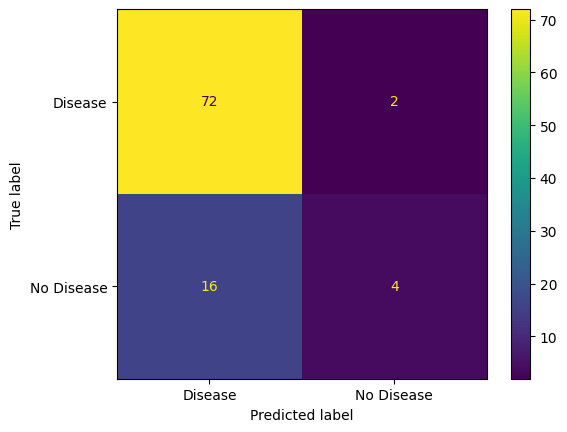

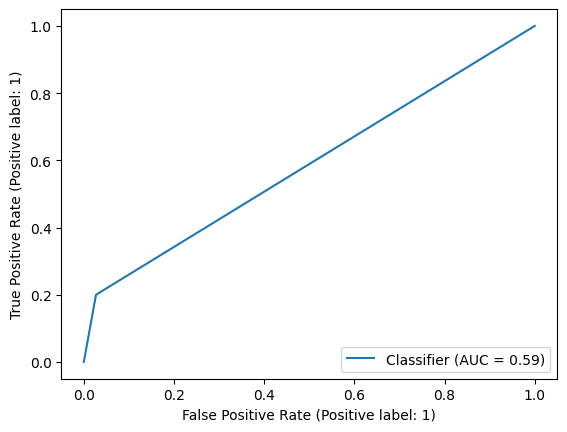

Analysis of Females for experiment 0
The Training Score is  0.86
The Test     Score is  0.86
Accuracy     Score is  0.83
Precision    Score is  0.71
Recall       Score is  0.12
best               is  {'logisticRegression__solver': 'newton-cholesky'}


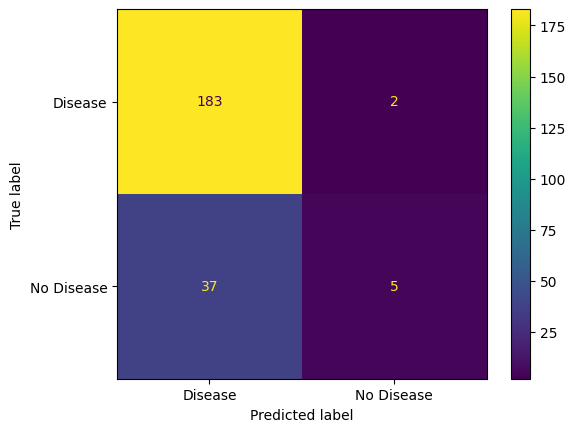

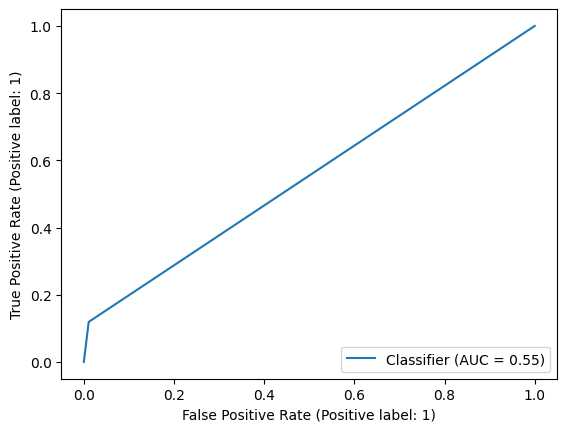

Analysis of Males for experiment 1
The Training Score is  0.83
The Test     Score is  0.8
Accuracy     Score is  0.81
Precision    Score is  0.67
Recall       Score is  0.2
best               is  {'logisticRegression__solver': 'lbfgs'}


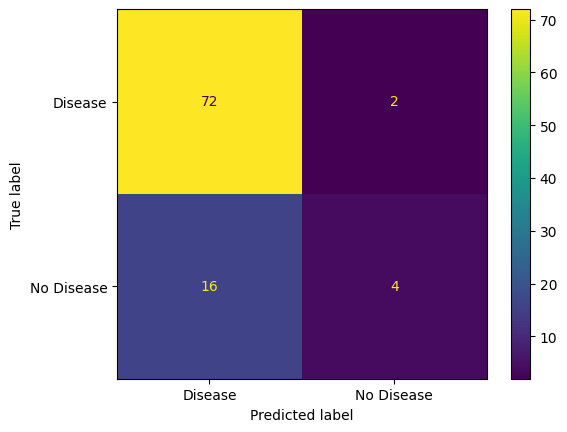

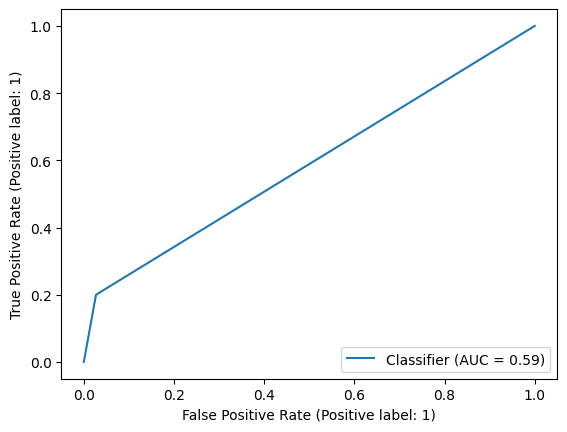

Analysis of Females for experiment 1
The Training Score is  0.86
The Test     Score is  0.85
Accuracy     Score is  0.83
Precision    Score is  0.71
Recall       Score is  0.12
best               is  {'logisticRegression__solver': 'lbfgs'}


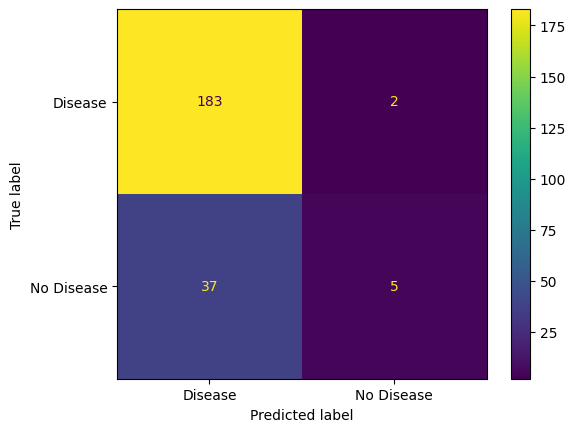

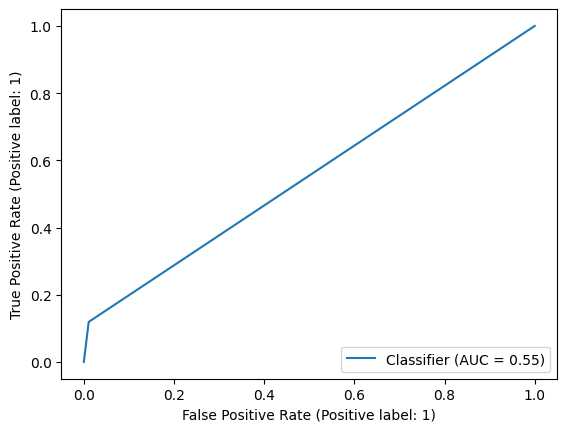

Analysis of Males for experiment 2
The Training Score is  0.83
The Test     Score is  0.81
Accuracy     Score is  0.82
Precision    Score is  0.71
Recall       Score is  0.25
best               is  {'logisticRegression__C': 100, 'logisticRegression__class_weight': None, 'logisticRegression__penalty': 'l2'}


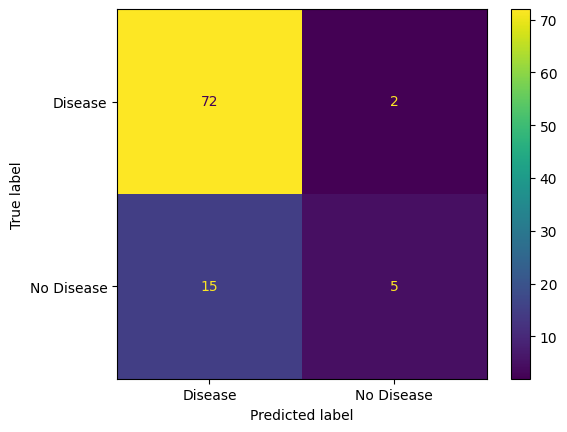

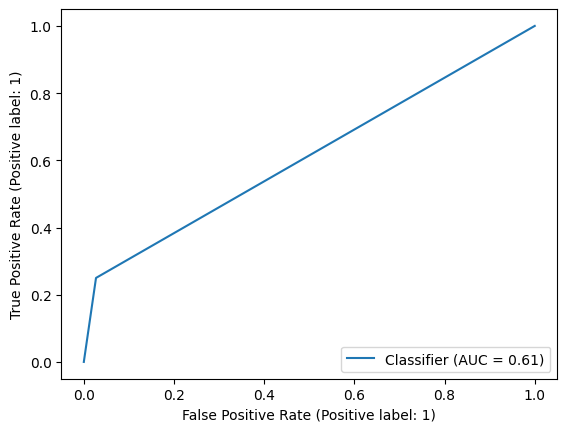

Analysis of Females for experiment 2
The Training Score is  0.86
The Test     Score is  0.86
Accuracy     Score is  0.82
Precision    Score is  0.62
Recall       Score is  0.12
best               is  {'logisticRegression__C': 100, 'logisticRegression__class_weight': None, 'logisticRegression__penalty': None}


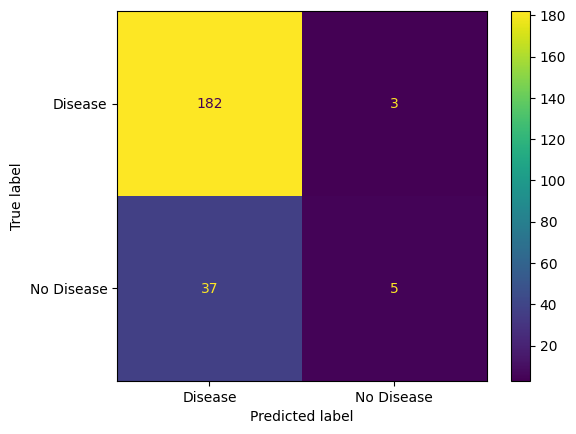

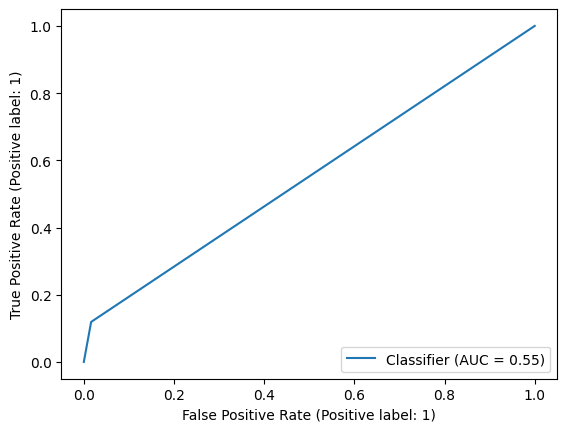

In [240]:
for index in range(0,len(experiments)):
    print("Analysis of Males for experiment", index)
    results(grid_male_list[index], 'logisticRegression', XTest_male, yTest_male, y_predictions_male_list[index], model_2_logistic_male, "h_model_2_logistic_male")

    print("Analysis of Females for experiment", index)    
    results(grid_female_list[index], 'logisticRegression', XTest_female, yTest_female, y_predictions_female_list[index], model_2_logistic_female, "h_model_2_logistic_female")

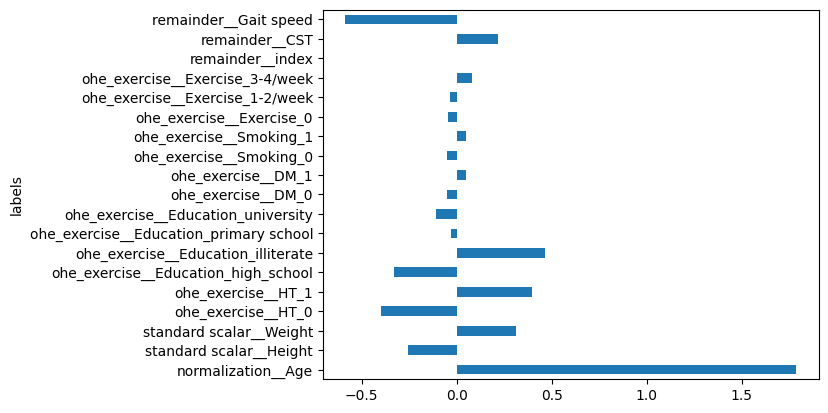

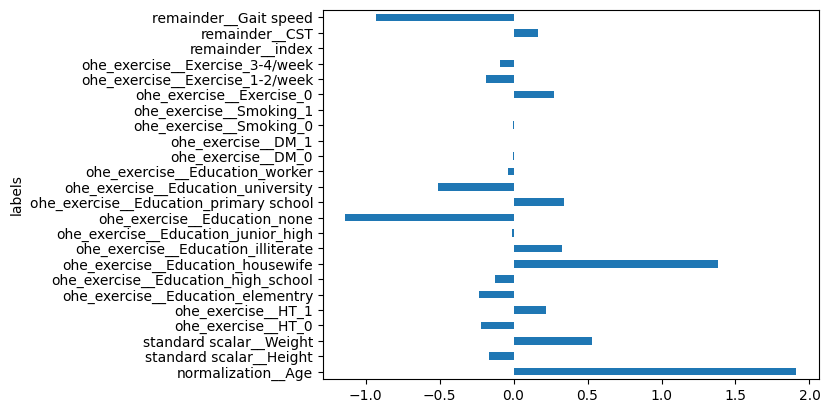

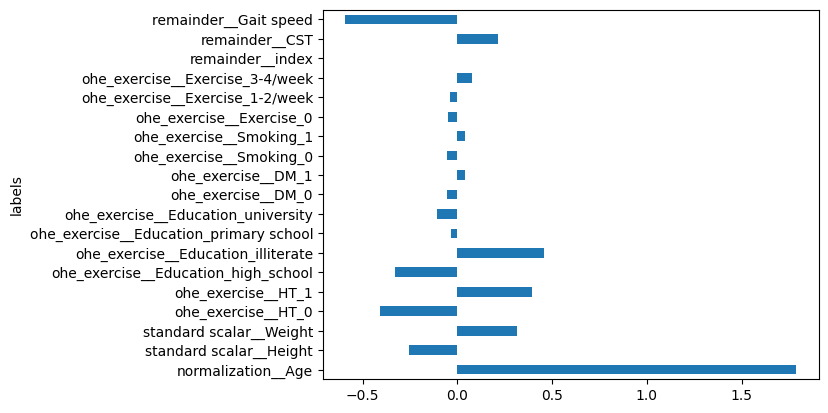

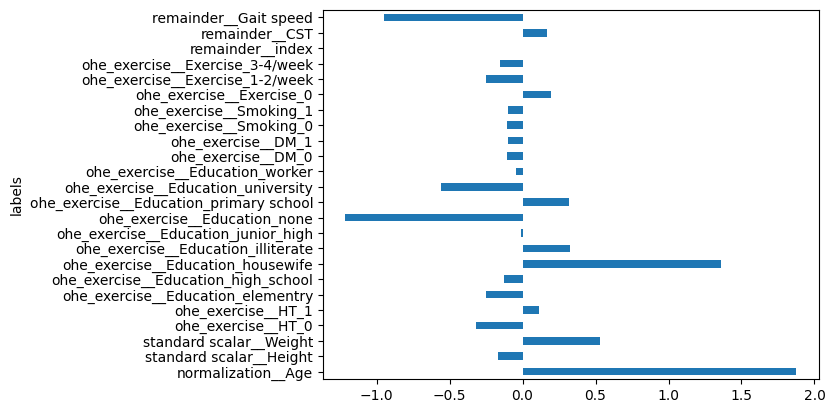

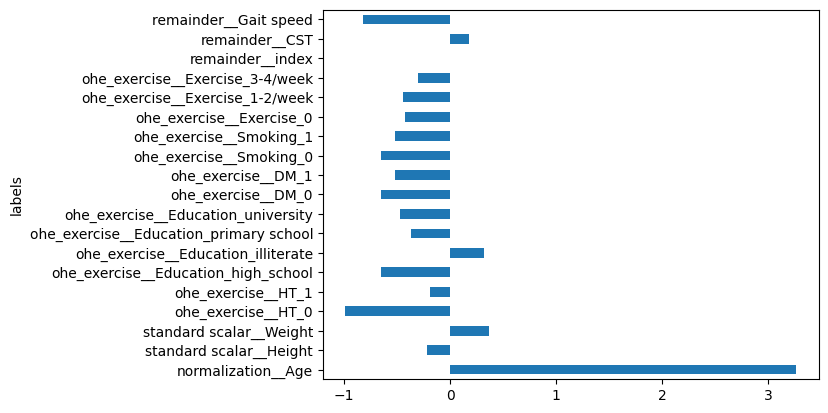

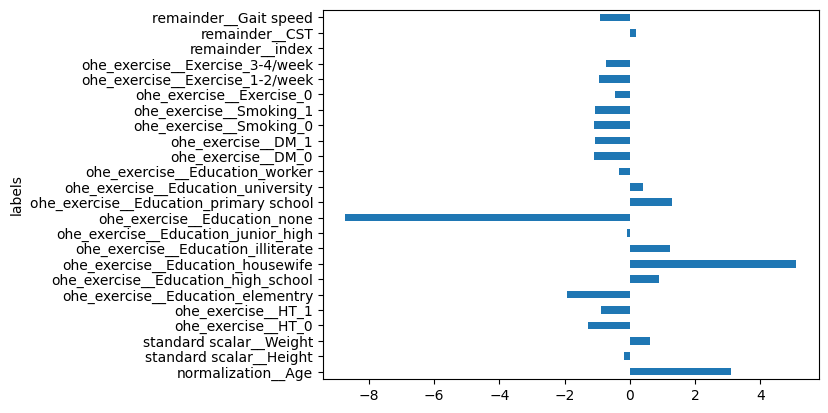

In [241]:
for index in range(0,len(experiments)):
    feature(grid_male_list[index])
    feature(grid_female_list[index])

In [242]:
print("Historical results for male")
getDataFrame("h_model_2_logistic_male")

Historical results for male


,Best Parameters,Training Score,Testing Score,Accuracy,Precision,Recall
0,{'logisticRegression__solver': 'newton-cholesky'},0.83,0.80,0.81,0.67,0.20
1,{'logisticRegression__solver': 'lbfgs'},0.83,0.80,0.81,0.67,0.20
2,"{'logisticRegression__C': 100, 'logisticRegression__class_weight': None, 'logisticRegression__penalty': 'l2'}",0.83,0.81,0.82,0.71,0.25


In [243]:
print("Historical results for female")
getDataFrame("h_model_2_logistic_female")

Historical results for female


,Best Parameters,Training Score,Testing Score,Accuracy,Precision,Recall
0,{'logisticRegression__solver': 'newton-cholesky'},0.86,0.86,0.83,0.71,0.12
1,{'logisticRegression__solver': 'lbfgs'},0.86,0.85,0.83,0.71,0.12
2,"{'logisticRegression__C': 100, 'logisticRegression__class_weight': None, 'logisticRegression__penalty': None}",0.86,0.86,0.82,0.62,0.12


In [244]:

from sklearn.ensemble import RandomForestClassifier

# Make the PipeLine 
pipeline = Pipeline(
    [
        ( "Column Transformers", columnTransformer),
        ( "RandomForest", RandomForestClassifier(n_jobs=-1))
    ])

# Get the default case
parameters1 = {}

parameters2 = {
    'RandomForest__n_estimators': [100,500,750],
    'RandomForest__max_features': [ 'sqrt', "log2", 18],
    'RandomForest__max_depth': [None, 5, 10],
    'RandomForest__max_samples': [10, 15]
}

grid_male_list = []
grid_female_list = []
prediction_male_list = []
prediction_female_list = []

experiments = [ parameters1, parameters2 ]
for experiment in experiments:
    (grid, y_predictions_male) = trainTestScore(pipeline,   experiment, 10, (XTrain_male, yTrain_male), (XTest_male, yTest_male))
    (grid2, y_predictions_female) = trainTestScore(pipeline,  experiment, 10, (XTrain_female, yTrain_female), (XTest_female, yTest_female))

    grid_male_list.append(grid)
    grid_female_list.append(grid2)
    prediction_male_list.append(y_predictions_male)
    prediction_female_list.append(y_predictions_female)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV 1/10] END .............., score=(train=1.000, test=0.750) total time=   0.7s
[CV 2/10] END .............., score=(train=1.000, test=0.964) total time=   0.0s
[CV 3/10] END .............., score=(train=1.000, test=0.750) total time=   0.0s
[CV 4/10] END .............., score=(train=1.000, test=0.750) total time=   0.0s
[CV 5/10] END .............., score=(train=1.000, test=0.821) total time=   0.0s
[CV 6/10] END .............., score=(train=1.000, test=0.821) total time=   0.0s
[CV 7/10] END .............., score=(train=1.000, test=0.750) total time=   0.0s
[CV 8/10] END .............., score=(train=1.000, test=0.893) total time=   0.0s
[CV 9/10] END .............., score=(train=0.996, test=0.821) total time=   0.0s
[CV 10/10] END ............., score=(train=1.000, test=0.852) total time=   0.0s
(94, 11)
Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV 1/10] END .............., score=(train=1.000, test=0.85

The Training Score is  1.0
The Test     Score is  0.82
Accuracy     Score is  0.84
Precision    Score is  0.73
Recall       Score is  0.4
best               is  {}


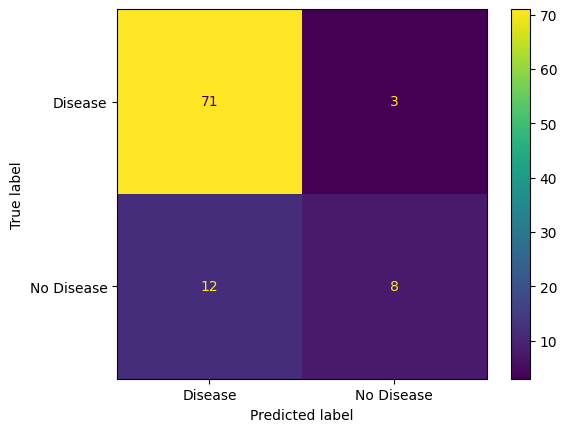

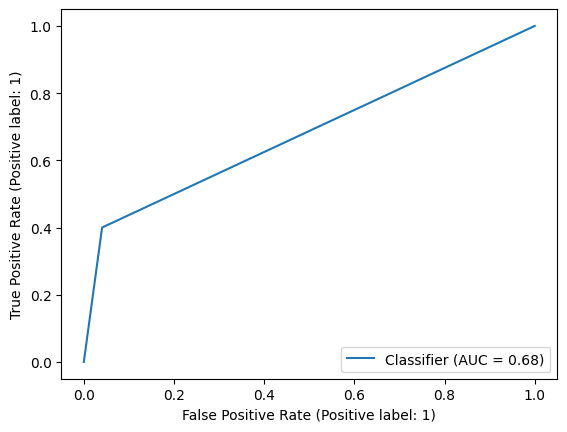

The Training Score is  1.0
The Test     Score is  0.87
Accuracy     Score is  0.82
Precision    Score is  0.54
Recall       Score is  0.17
best               is  {}


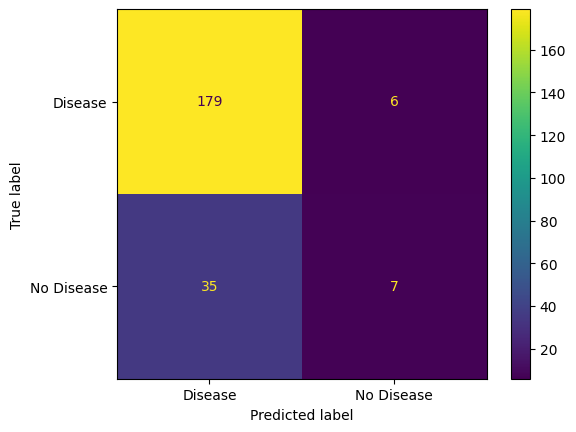

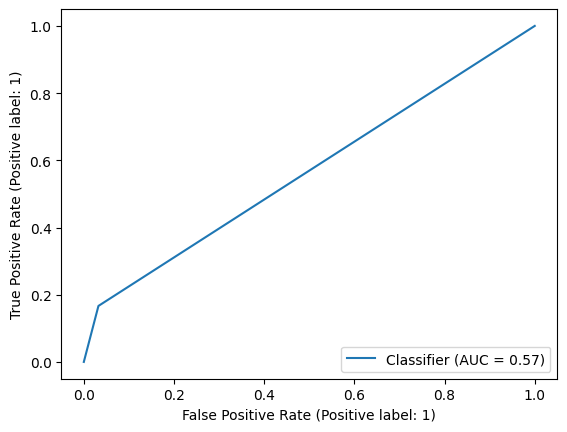

The Training Score is  0.77
The Test     Score is  0.76
Accuracy     Score is  0.83
Precision    Score is  0.83
Recall       Score is  0.25
best               is  {'RandomForest__max_depth': 5, 'RandomForest__max_features': 18, 'RandomForest__max_samples': 15, 'RandomForest__n_estimators': 100}


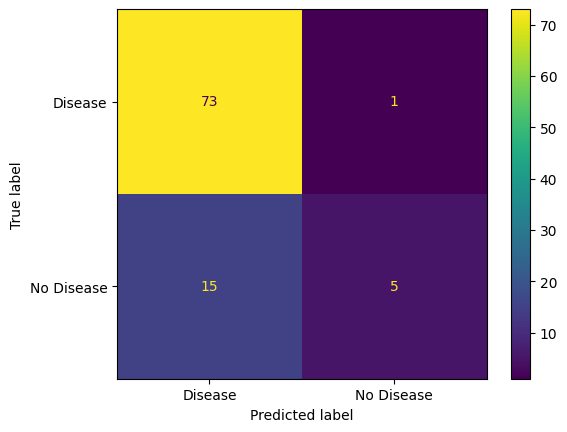

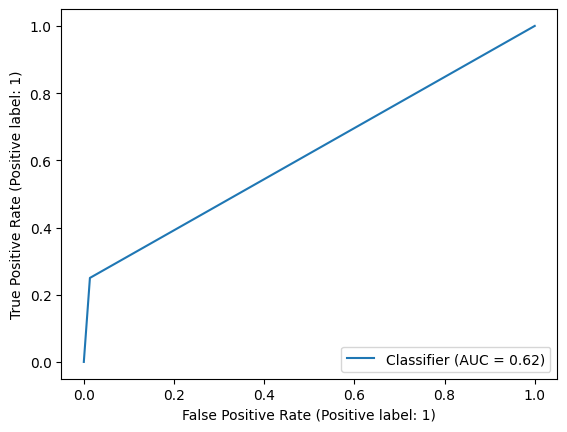

The Training Score is  0.84
The Test     Score is  0.84
Accuracy     Score is  0.82
Precision    Score is  0.67
Recall       Score is  0.05
best               is  {'RandomForest__max_depth': None, 'RandomForest__max_features': 18, 'RandomForest__max_samples': 15, 'RandomForest__n_estimators': 100}


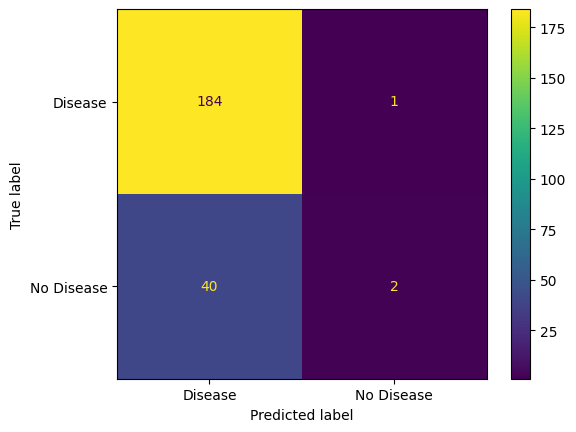

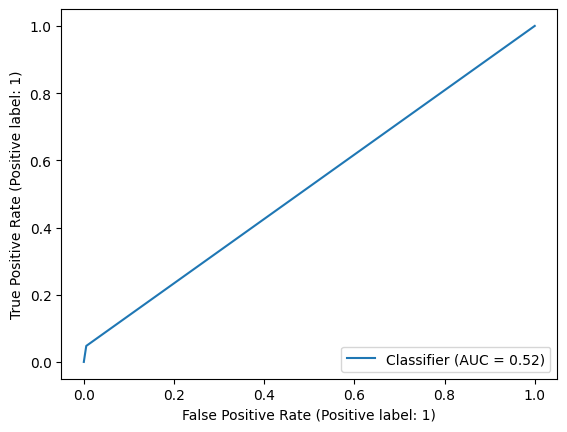

In [245]:
for index in range(0,len(experiments)):
    results(grid_male_list[index],  "RandomForest", XTest_male, yTest_male, prediction_male_list[index], model_2_forest_male, "h_model_2_forest_male")
    results(grid_female_list[index], "RandomForest", XTest_female, yTest_female, prediction_female_list[index], model_2_forest_female, "h_model_2_forest_female")

model =  <class 'sklearn.ensemble._forest.RandomForestClassifier'>
model =  <class 'sklearn.ensemble._forest.RandomForestClassifier'>
model =  <class 'sklearn.ensemble._forest.RandomForestClassifier'>
model =  <class 'sklearn.ensemble._forest.RandomForestClassifier'>


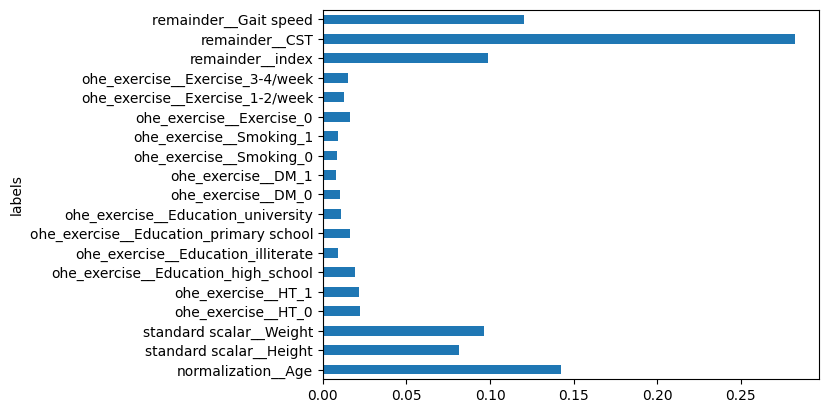

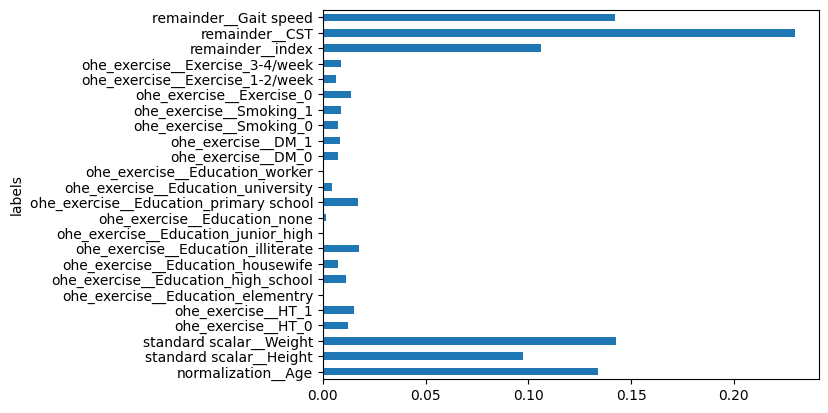

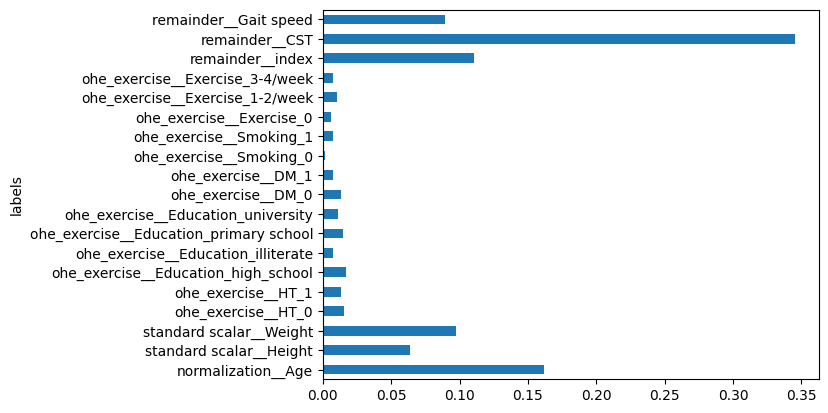

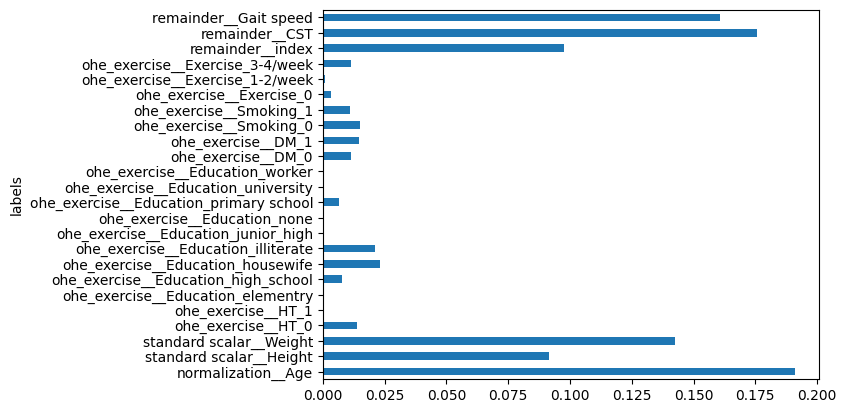

In [246]:
for index in range(0,len(experiments)):
    feature_random_forest(grid_male_list[index])
    feature_random_forest(grid_female_list[index])

In [247]:
print("Historical results for male")
getDataFrame("h_model_2_forest_male")

Historical results for male


,Best Parameters,Training Score,Testing Score,Accuracy,Precision,Recall
0,{},1.00,0.82,0.84,0.73,0.40
1,"{'RandomForest__max_depth': 5, 'RandomForest__max_features': 18, 'RandomForest__max_samples': 15, 'RandomForest__n_estimators': 100}",0.77,0.76,0.83,0.83,0.25


In [248]:
print("Historical reults for female")
getDataFrame("h_model_2_forest_female")

Historical reults for female


,Best Parameters,Training Score,Testing Score,Accuracy,Precision,Recall
0,{},1.00,0.87,0.82,0.54,0.17
1,"{'RandomForest__max_depth': None, 'RandomForest__max_features': 18, 'RandomForest__max_samples': 15, 'RandomForest__n_estimators': 100}",0.84,0.84,0.82,0.67,0.05


In [249]:
from sklearn.ensemble import GradientBoostingClassifier

parameters = {}
parameters_1 = {
    'min_samples_split': [2,3],
    'min_samples': [25, 50, 75],
    'max_depth': [5,8],
    'max_features': ["sqrt","log2", 15 ]
}

# Make the PipeLine 
pipeline = Pipeline(
    [
        ( "Column Transformers", columnTransformer),
        ( "Gradient ", GradientBoostingClassifier())
    ])

grid_males = []
grid_females = []
y_prediction_males = []
y_prediction_females = [] 

experiments = [ parameters, parameters_1 ]
for experiment in experiments: 
    (grid, y_predictions_male) = trainTestScore(pipeline, parameters, 10, (XTrain_male, yTrain_male), (XTest_male, yTest_male))
    (grid2, y_predictions_female) = trainTestScore(pipeline, parameters, 10, (XTrain_female, yTrain_female), (XTest_female, yTest_female))
    grid_males.append(grid)
    grid_females.append(grid2)
    y_prediction_females.append(y_prediction_females)
    y_prediction_males.append(y_prediction_males)    

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV 1/10] END .............., score=(train=0.984, test=0.821) total time=   0.0s
[CV 2/10] END .............., score=(train=0.976, test=0.929) total time=   0.0s
[CV 3/10] END .............., score=(train=0.988, test=0.857) total time=   0.0s
[CV 4/10] END .............., score=(train=0.992, test=0.857) total time=   0.0s
[CV 5/10] END .............., score=(train=0.988, test=0.821) total time=   0.0s
[CV 6/10] END .............., score=(train=0.988, test=0.857) total time=   0.0s
[CV 7/10] END .............., score=(train=0.992, test=0.750) total time=   0.0s
[CV 8/10] END .............., score=(train=0.984, test=0.786) total time=   0.0s
[CV 9/10] END .............., score=(train=0.988, test=0.893) total time=   0.0s
[CV 10/10] END ............., score=(train=0.988, test=0.852) total time=   0.0s
(94, 11)
Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV 1/10] END .............., score=(train=0.966, test=0.88

The Training Score is  1.0
The Test     Score is  0.82
Accuracy     Score is  0.84
Precision    Score is  0.73
Recall       Score is  0.4
best               is  {}


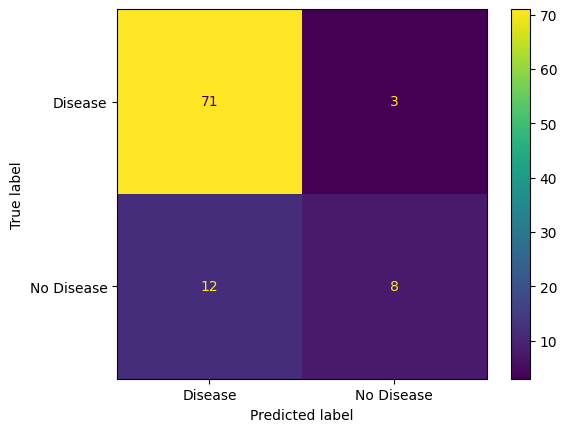

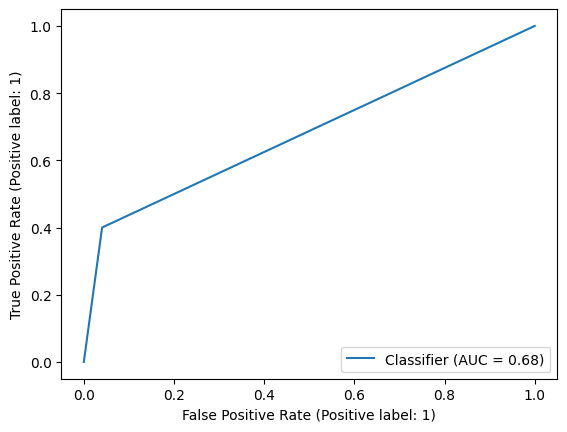

The Training Score is  1.0
The Test     Score is  0.87
Accuracy     Score is  0.82
Precision    Score is  0.54
Recall       Score is  0.17
best               is  {}


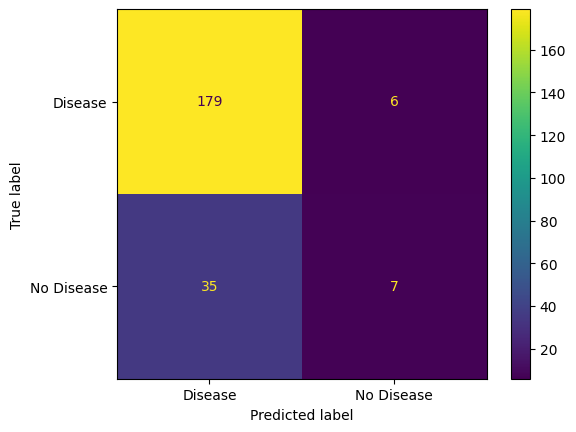

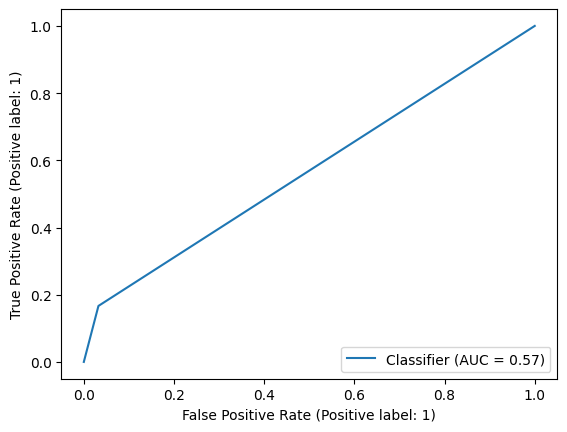

The Training Score is  0.77
The Test     Score is  0.76
Accuracy     Score is  0.83
Precision    Score is  0.83
Recall       Score is  0.25
best               is  {'RandomForest__max_depth': 5, 'RandomForest__max_features': 18, 'RandomForest__max_samples': 15, 'RandomForest__n_estimators': 100}


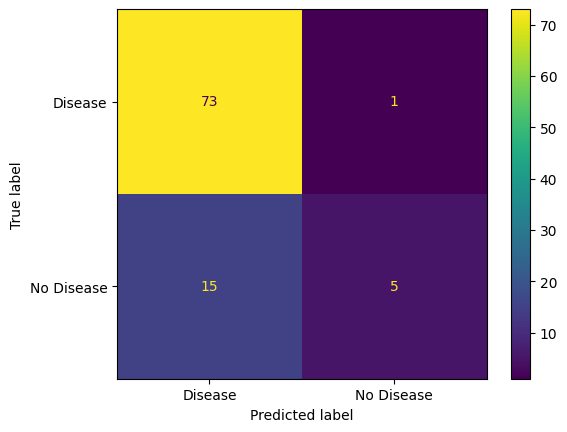

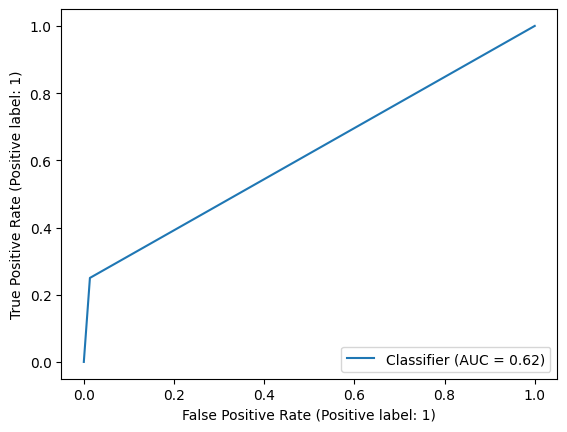

The Training Score is  0.84
The Test     Score is  0.84
Accuracy     Score is  0.82
Precision    Score is  0.67
Recall       Score is  0.05
best               is  {'RandomForest__max_depth': None, 'RandomForest__max_features': 18, 'RandomForest__max_samples': 15, 'RandomForest__n_estimators': 100}


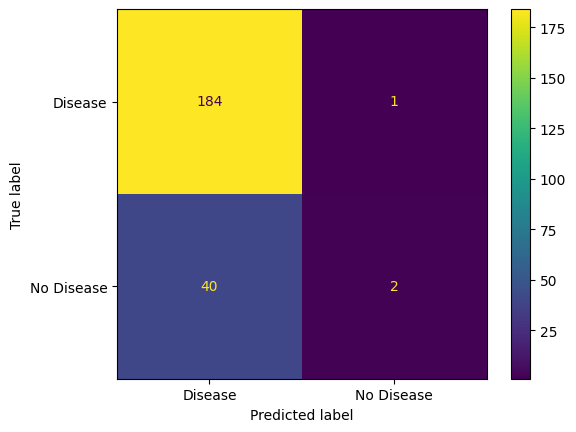

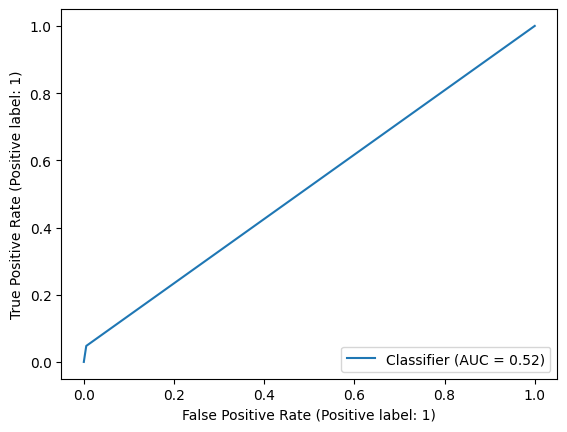

In [250]:
for index in range(0,len(experiments)):
    results(grid_male_list[index],  "RandomForest", XTest_male, yTest_male, prediction_male_list[index], model_2_gradient_male, "h_model_2_gradient_male")
    results(grid_female_list[index], "RandomForest", XTest_female, yTest_female, prediction_female_list[index], model_2_gradient_male, "h_model_2_gradient_female")

In [251]:
print("Historical results for male")
getDataFrame("h_model_2_gradient_male")

Historical results for male


,Best Parameters,Training Score,Testing Score,Accuracy,Precision,Recall
0,{},1.00,0.82,0.84,0.73,0.40
1,{},1.00,0.87,0.82,0.54,0.17
2,"{'RandomForest__max_depth': 5, 'RandomForest__max_features': 18, 'RandomForest__max_samples': 15, 'RandomForest__n_estimators': 100}",0.77,0.76,0.83,0.83,0.25


In [252]:
print("Historical results for female")
getDataFrame("h_model_2_gradient_female")

Historical results for female


,Best Parameters,Training Score,Testing Score,Accuracy,Precision,Recall
0,{},1.00,0.82,0.84,0.73,0.40
1,{},1.00,0.87,0.82,0.54,0.17
2,"{'RandomForest__max_depth': 5, 'RandomForest__max_features': 18, 'RandomForest__max_samples': 15, 'RandomForest__n_estimators': 100}",0.77,0.76,0.83,0.83,0.25
3,"{'RandomForest__max_depth': None, 'RandomForest__max_features': 18, 'RandomForest__max_samples': 15, 'RandomForest__n_estimators': 100}",0.84,0.84,0.82,0.67,0.05
